# Capstone Project - Intro to Data Science

Dataset description: This dataset features ratings data of 400 movies from 1097 research participants and is contained in the file “movieReplicationSet.csv”. It is organized as follows:
1st row: Headers (Movie titles/questions) – note that the indexing in this list is from 1
Row 2-1098: Responses from individual participants
Columns 1-400: These columns contain the ratings for the 400 movies (0 to 4, and missing) Columns 401-420: These columns contain self-assessments on sensation seeking behaviors (1-5) Columns 421-464: These columns contain responses to personality questions (1-5)
Columns 465-474: These columns contain self-reported movie experience ratings (1-5)
Column 475: Gender identity (1 = female, 2 = male, 3 = self-described)
Column 476: Only child (1 = yes, 0 = no, -1 = no response)
Column 477: Social viewing preference – “movies are best enjoyed alone” (1 = y, 0 = n, -1 = nr)

In [679]:
# Load libraries/packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.cluster import DBSCAN
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LinearRegression

In [761]:
#Read data
#Load data:
df = pd.read_csv('movieReplicationSet.csv',skipinitialspace=True)
# Fill empty strings with NaN; skip spaces after delimiter 

movieRatings = df.iloc[:,0:400]
sensaSeek = df.iloc[:,400:420]
personalities = df.iloc[:,420:464]
movieExp = df.iloc[:,464:474]
gender = df.iloc[:,474]
onlyChild = df.iloc[:,475]
socialViewPref = df.iloc[:,476]

### Question 1

What is the relationship between sensation seeking and movie experience?

In [762]:
combined = pd.concat([sensaSeek, movieExp], axis=1)
combined = combined.dropna(axis=0,how='any')

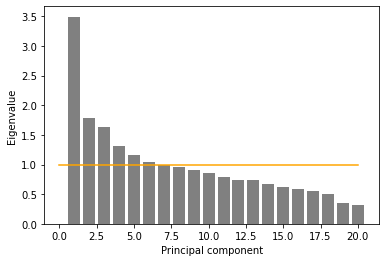

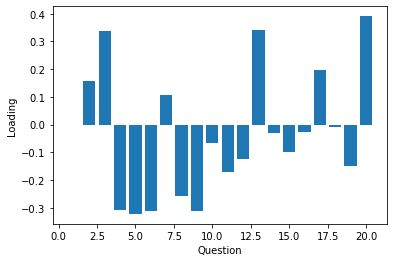

Index(['I enjoy driving fast', 'I enjoy rollercoasters ',
       'Have you ever bungee-jumped?', 'I enjoy impulse shopping',
       'I sometimes go out on weeknights even if I have work to do',
       'I enjoy doing things without too much planning ',
       'Have you ever been rock climbing?',
       'I enjoy being in large loud crowds like the Times Square Ball Drop on New Years Eve',
       'I enjoy going to large music or dance festivals ',
       'I enjoy watching horror movies', 'No risk - No fun',
       'I like to be surprised even if it startles or scares me',
       'Have you ever parachuted?', 'I enjoy haunted houses',
       'I had a sheltered upbringing', 'My life is very stressful',
       'I value my life to be well ordered and predictable',
       'Have you ridden a motorcycle?', 'Have you gambled or bet for money?',
       'Have you ever been sky-diving?'],
      dtype='object')
Have you ever bungee-jumped?
Have you ever parachuted?
Have you ever been sky-diving?


In [764]:
#Sensation Seeking

#remove nan row-wise, per characteristics 
#then do PCA
#need to attach index before drop nan
#stack index row 
sensaSeek = combined.iloc[:,0:20]
'''
indArr = []
for i in range(df.shape[0]):
    indArr.append(i)
sensaSeek.insert(0,'index',indArr)

sensaSeek = sensaSeek.dropna(axis=0,how='any')

#separate the index column out
indSensa = sensaSeek.index.to_numpy()
sensaSeek = sensaSeek.drop('index',axis=1)

sensaSeek = sensaSeek.dropna(axis=0,how='any')
ssi = sensaSeek.index
'''

#PCA
zscoredData = stats.zscore(sensaSeek)
pca = PCA().fit(zscoredData)
eigVals = pca.explained_variance_
loadings = pca.components_*-1
rotatedSensaSeek = pca.fit_transform(zscoredData)*-1

#scree plot for sensation seeking
numClasses = sensaSeek.shape[1]
x = np.linspace(1,numClasses,numClasses)
plt.bar(x, eigVals, color='gray')
plt.plot([0,numClasses],[1,1],color='orange') # Orange Kaiser criterion line for the fox
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

# Interpreting the factors 
sensaSeekQuestions = sensaSeek.columns
whichPrincipalComponent = 1 # Select and look at once factor at a time 
plt.bar(x,loadings[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show() # Show bar plot

# Display questions
print(sensaSeekQuestions) 
print(sensaSeekQuestions[2]) 
print(sensaSeekQuestions[12]) 
print(sensaSeekQuestions[19]) 
#seeking the thrilling feelings in the sky/flying?

The 3 questions with the highest absolute loading values are:
Have you ever bungee-jumped?
Have you ever parachuted?
Have you ever been sky-diving?
These questions can be interpreted as ‘seeking the thrilling feelings in the sky/flying’.

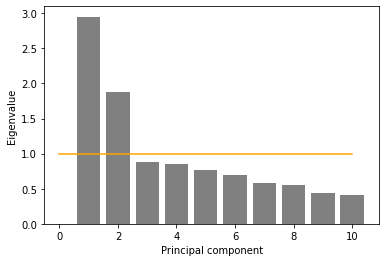

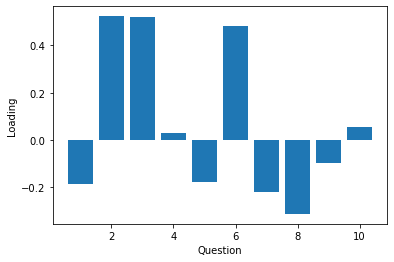

Index(['I have cried during a movie',
       'I have trouble following the story of a movie',
       'I have trouble remembering the story of a movie a couple of days after seeing it',
       'When watching a movie I cheer or shout or talk or curse at the screen',
       'When watching a movie I feel like the things on the screen are happening to me',
       'As a movie unfolds I start to have problems keeping track of events that happened earlier',
       'The emotions on the screen "rub off" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared',
       'When watching a movie I get completely immersed in the alternative reality of the film',
       'Movies change my position on social economic or political issues',
       'When watching movies things get so intense that I have to stop watching'],
      dtype='object')

I have trouble following the story of a movie
I have trouble remembering the story of a movie a couple of 

In [428]:
#Movie Experience

#remove nan row-wise, per characteristics 
#then do PCA
#need to attach index before drop nan
#stack index row 
'''
indArr = []
for i in range(df.shape[0]):
    indArr.append(i)
movieExp.insert(0,'index',indArr)

movieExp = movieExp.dropna(axis=0,how='any')

#separate the index column out
indMovieExp = movieExp.index.to_numpy()
movieExp = movieExp.drop('index',axis=1)
'''
movieExp = combined.iloc[:,20:]

#PCA
zscoredData = stats.zscore(movieExp)
pca = PCA().fit(zscoredData)
eigVals = pca.explained_variance_
loadings = pca.components_*-1
rotatedMovieExp = pca.fit_transform(zscoredData)*-1

#scree plot for sensation seeking
numClasses = movieExp.shape[1]
x = np.linspace(1,numClasses,numClasses)
plt.bar(x, eigVals, color='gray')
plt.plot([0,numClasses],[1,1],color='orange') # Orange Kaiser criterion line for the fox
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

# Interpreting the factors 
movieExpQuestions = movieExp.columns
whichPrincipalComponent = 1 # Select and look at once factor at a time 
plt.bar(x,loadings[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show() # Show bar plot

# Display questions
print(movieExpQuestions)
print()
print(movieExpQuestions[1]) 
print(movieExpQuestions[2]) 
print(movieExpQuestions[5]) 

#memory issue

The 3 movie experiences with the highest absolute loading values are:
I have trouble following the story of a movie
I have trouble remembering the story of a movie a couple of days after seeing it
As a movie unfolds I start to have problems keeping track of events that happened earlier
These movie experiences can be interpreted as ‘issues with following/memorizing the movies’.

[[1.         0.01248172]
 [0.01248172 1.        ]]


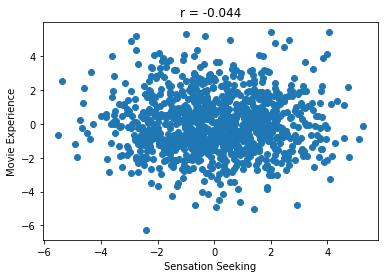

In [450]:
#correlation
data1 = rotatedSensaSeek[:,0]
data2 = rotatedMovieExp[:,0]
# Plot data:
plt.plot(data1,data2,'o')
plt.xlabel('Sensation Seeking')
plt.ylabel('Movie Experience')
plt.title('r = {:.3f}'.format(r[0,1]))

r = np.corrcoef(data1,data2)
print(r)

The correlation coefficient was 0.125, so there is no linear relationship between sensation seeking factors, specifically ‘seeking the thrilling feelings in the sky/flying’, and movie experience, specifically  ‘issues with following/memorizing the movies’.
Plotting the data points using the first principle components for each dataset. We could see that the data points mainly clustered around the center.

### Question 2

Is there evidence of personality types based on the data of these research participants? If so,
characterize these types both quantitatively and narratively.

In [596]:
#remove nan row-wise, per characteristics 
#then do PCA
#need to attach index before drop nan
personalities = personalities.dropna(axis=0,how='any')
personaInd = personalities.index

zscoredPersona = stats.zscore(personalities)
pcaPersona = PCA().fit(zscoredPersona)
eigValsPersona = pcaPersona.explained_variance_
loadingsPersona = pcaPersona.components_
rotatedPersona = pcaPersona.fit_transform(zscoredPersona)

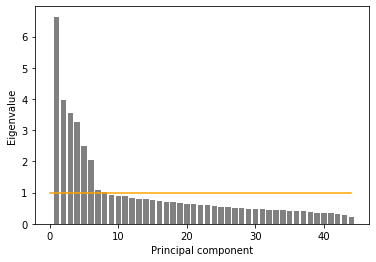

In [597]:
#scree plot for personalities
numClassesPersona = personalities.shape[1]
x = np.linspace(1,numClassesPersona,numClassesPersona)
plt.bar(x, eigValsPersona, color='gray')
plt.plot([0,numClassesPersona],[1,1],color='orange') # Orange Kaiser criterion line for the fox
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

In [598]:
print('Number of factors selected by Elbow criterion: 6')

Number of factors selected by Elbow criterion: 6


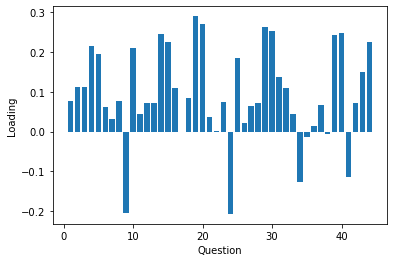

Worries a lot


In [599]:
#PC 1
personaQuestions = personalities.columns
whichPrincipalComponent = 1 # Select and look at once factor at a time 
plt.bar(x,loadingsPersona[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show() # Show bar plot

loadAbs = np.abs(loadingsPersona[whichPrincipalComponent,:])
#stack index row 
indArr = []
for i in range(loadAbs.shape[0]):
    indArr.append(i)
indArr = np.array(indArr,dtype=int)
loadAbs = np.stack((indArr,loadAbs),axis=0)
loadAbs = np.transpose(loadAbs)
loadingsAbs = pd.DataFrame(loadAbs,columns=['index','loadingsAbs'])

loadingsAbs = loadingsAbs.sort_values('loadingsAbs', axis=0,ascending=False)
#print(loadingsAbs)

# Display questions
indexes = loadingsAbs.loc[:,loadingsAbs.columns.str.contains('index')] 
maxInd = int(indexes.iloc[0])
print(personaQuestions[maxInd])

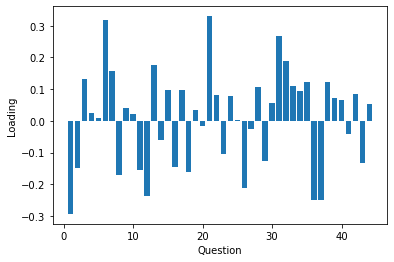

Tends to be quiet


In [600]:
#PC 2
personaQuestions = personalities.columns
whichPrincipalComponent = 2 # Select and look at once factor at a time 
plt.bar(x,loadingsPersona[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show() # Show bar plot

loadAbs = np.abs(loadingsPersona[whichPrincipalComponent,:])
#stack index row 
indArr = []
for i in range(loadAbs.shape[0]):
    indArr.append(i)
indArr = np.array(indArr,dtype=int)
loadAbs = np.stack((indArr,loadAbs),axis=0)
loadAbs = np.transpose(loadAbs)
loadingsAbs = pd.DataFrame(loadAbs,columns=['index','loadingsAbs'])

loadingsAbs = loadingsAbs.sort_values('loadingsAbs', axis=0,ascending=False)

# Display questions
indexes = loadingsAbs.loc[:,loadingsAbs.columns.str.contains('index')] 
maxInd = int(indexes.iloc[0])
print(personaQuestions[maxInd])

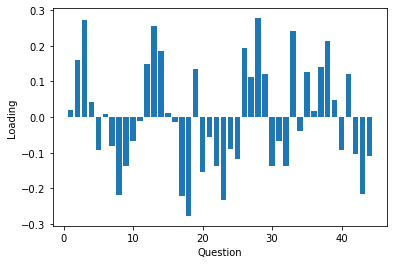

Tends to be disorganized


In [601]:
#PC 3
personaQuestions = personalities.columns
whichPrincipalComponent = 3 # Select and look at once factor at a time 
plt.bar(x,loadingsPersona[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show() # Show bar plot

loadAbs = np.abs(loadingsPersona[whichPrincipalComponent,:])
#stack index row 
indArr = []
for i in range(loadAbs.shape[0]):
    indArr.append(i)
indArr = np.array(indArr,dtype=int)
loadAbs = np.stack((indArr,loadAbs),axis=0)
loadAbs = np.transpose(loadAbs)
loadingsAbs = pd.DataFrame(loadAbs,columns=['index','loadingsAbs'])

loadingsAbs = loadingsAbs.sort_values('loadingsAbs', axis=0,ascending=False)

# Display questions
indexes = loadingsAbs.loc[:,loadingsAbs.columns.str.contains('index')] 
maxInd = int(indexes.iloc[0])
print(personaQuestions[maxInd])

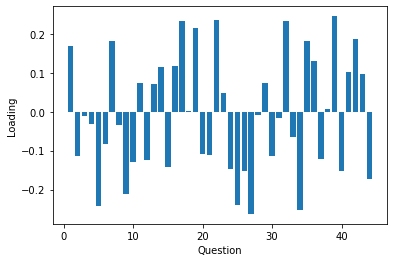

Can be cold and aloof


In [602]:
#PC 4
personaQuestions = personalities.columns
whichPrincipalComponent = 4 # Select and look at once factor at a time 
plt.bar(x,loadingsPersona[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show() # Show bar plot

loadAbs = np.abs(loadingsPersona[whichPrincipalComponent,:])
#stack index row 
indArr = []
for i in range(loadAbs.shape[0]):
    indArr.append(i)
indArr = np.array(indArr,dtype=int)
loadAbs = np.stack((indArr,loadAbs),axis=0)
loadAbs = np.transpose(loadAbs)
loadingsAbs = pd.DataFrame(loadAbs,columns=['index','loadingsAbs'])

loadingsAbs = loadingsAbs.sort_values('loadingsAbs', axis=0,ascending=False)

# Display questions
indexes = loadingsAbs.loc[:,loadingsAbs.columns.str.contains('index')] 
maxInd = int(indexes.iloc[0])
print(personaQuestions[maxInd])

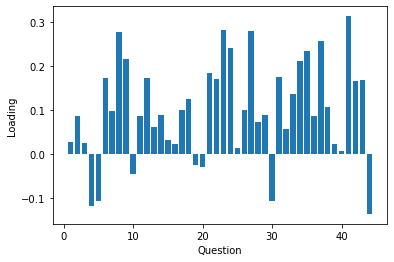

Has few artistic interests


In [603]:
#PC 5
personaQuestions = personalities.columns
whichPrincipalComponent = 5 # Select and look at once factor at a time 
plt.bar(x,loadingsPersona[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show() # Show bar plot

loadAbs = np.abs(loadingsPersona[whichPrincipalComponent,:])
#stack index row 
indArr = []
for i in range(loadAbs.shape[0]):
    indArr.append(i)
indArr = np.array(indArr,dtype=int)
loadAbs = np.stack((indArr,loadAbs),axis=0)
loadAbs = np.transpose(loadAbs)
loadingsAbs = pd.DataFrame(loadAbs,columns=['index','loadingsAbs'])

loadingsAbs = loadingsAbs.sort_values('loadingsAbs', axis=0,ascending=False)

# Display questions
indexes = loadingsAbs.loc[:,loadingsAbs.columns.str.contains('index')] 
maxInd = int(indexes.iloc[0])
print(personaQuestions[maxInd])

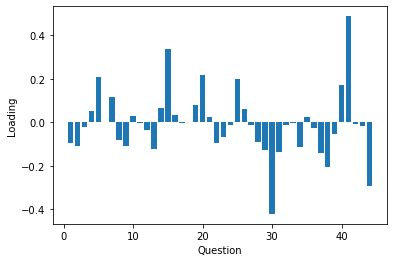

Has few artistic interests


In [604]:
#PC 6
personaQuestions = personalities.columns
whichPrincipalComponent = 6 # Select and look at once factor at a time 
plt.bar(x,loadingsPersona[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show() # Show bar plot

loadAbs = np.abs(loadingsPersona[whichPrincipalComponent,:])
#stack index row 
indArr = []
for i in range(loadAbs.shape[0]):
    indArr.append(i)
indArr = np.array(indArr,dtype=int)
loadAbs = np.stack((indArr,loadAbs),axis=0)
loadAbs = np.transpose(loadAbs)
loadingsAbs = pd.DataFrame(loadAbs,columns=['index','loadingsAbs'])

loadingsAbs = loadingsAbs.sort_values('loadingsAbs', axis=0,ascending=False)

# Display questions
indexes = loadingsAbs.loc[:,loadingsAbs.columns.str.contains('index')] 
maxInd = int(indexes.iloc[0])
print(personaQuestions[maxInd])

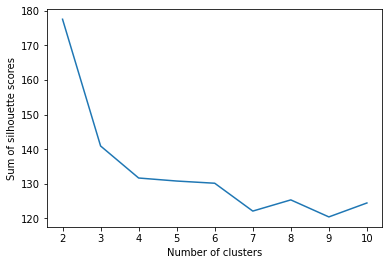

In [605]:
#Clustering
x = np.column_stack((rotatedPersona[:,0],rotatedPersona[:,1],rotatedPersona[:,2],rotatedPersona[:,3],rotatedPersona[:,4],rotatedPersona[:,5]))
# Silhouette: How similar to points in cluster vs. others, arbitrariness

# Remember: each data point gets its own silhouette coefficient ranging 
# from 0 (arbitrary classification) to 1 (ideal classification).

# Init:
numClusters = 9 # how many clusters are we looping over? (from 2 to 10)
Q = np.empty([numClusters,1])*np.NaN # init container to store sums

# Compute kMeans:
for ii in range(2, 11): # Loop through each cluster (from 2 to 10!)
    kMeans = KMeans(n_clusters = int(ii)).fit(x) # compute kmeans using scikit
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(x,cId) # compute the mean silhouette coefficient of all samples
    Q[ii-2] = sum(s) # take the sum
    
# Plot this to make it clearer what is going on
plt.plot(np.linspace(2,10,9),Q)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
plt.show()

# kMeans gives you the center coordinates of the clusters, assuming a number
# of clusters. Silhouette gives you how many are most unamigously described
# by the clusters. Most likely "real" number: Where the sum of the
# silhouette scores peaks. In reality, they are complementary. Use together

# Recompute kMeans:
numClusters = 2
kMeans = KMeans(n_clusters = numClusters).fit(x) 
cId = kMeans.labels_ 
cCoords = kMeans.cluster_centers_

In [606]:
cCoords

array([[-2.27720892e+00,  1.41366399e-01,  7.09973219e-02,
        -7.02251337e-02, -8.14114456e-02,  1.95199439e-03],
       [ 1.86317093e+00, -1.15663417e-01, -5.80887179e-02,
         5.74569276e-02,  6.66093646e-02, -1.59708632e-03]])

Number of factors selected by Elbow criterion: 6 <br>
List of personalities in the order of principle components:
1. Worries a lot
2. Tends to be quiet
3. Tends to be disorganized
4. Can be cold and aloof
5. Has few artistic interests
6. Has few artistic interests
<br>

Since the 5th and 6th principle components are representative of the same question, I chose to only used 5 principle components in this case

After doing unsupervised machine learning method of clustering, I found 2 clusters: <br>
Cluster 1: Sometimes worry, a bit loud, not disorganized, can be cold and aloof, has few characteristic interest <br>
Cluster 2: Usually do not worry a lot, a bit quiet, tends to be disorganized, usually not cold and aloof, has a lot of artistic interests

### Question 3

Are movies that are more popular rated higher than movies that are less popular?

In [516]:
numOfRatings = movieRatings.count()
medianNumOfRating = numOfRatings.median()

popularMovies = numOfRatings.loc[(numOfRatings > medianNumOfRating)]
unpopularMovies = numOfRatings.loc[(numOfRatings < medianNumOfRating)]
print(popularMovies)
print()
print(unpopularMovies)

Django Unchained (2012)                           453
Alien (1979)                                      289
Indiana Jones and the Last Crusade (1989)         463
Fargo (1996)                                      254
Black Swan (2010)                                 588
                                                 ... 
X-Men 2 (2003)                                    448
The Mask (1994)                                   398
Jaws (1975)                                       496
Harry Potter and the Chamber of Secrets (2002)    846
Anaconda (1997)                                   198
Length: 200, dtype: int64

The Life of David Gale (2003)         76
Wing Commander (1999)                 71
Snatch (2000)                        128
Rambo: First Blood Part II (1985)    182
Let the Right One In (2008)          137
                                    ... 
The Usual Suspects (1995)            193
Patton (1970)                         61
Twister (1996)                       174
MacArthur 

In [517]:
popularMoviesName = popularMovies.axes[0].tolist()
popularMoviesList = movieRatings.loc[:,(popularMoviesName)]
medPop = popularMoviesList.median(axis=0)

unpopularMoviesName = unpopularMovies.axes[0].tolist()
unpopularMoviesList = movieRatings.loc[:,(unpopularMoviesName)]
medUnpop = unpopularMoviesList.median(axis=0)

u,p = stats.mannwhitneyu(medPop,medUnpop)
print(p)

9.929258851707232e-35


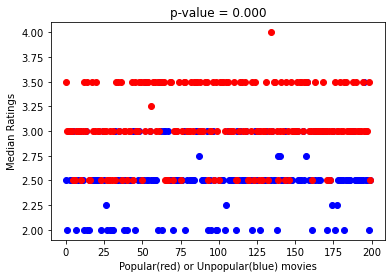

In [520]:
# Plot data:
plt.plot(medUnpop.values,'o',color="blue")
plt.plot(medPop.values,'o',color="red")
plt.xlabel('Popular(red) or Unpopular(blue) movies')
plt.ylabel('Median Ratings')
plt.title('p-value = {:.3f}'.format(p))
plt.show()

The popularity of a movie is how many ratings it has received 

I got the number count of ratings for every movies and the median of this list, then divide them into popular movies (more than median rating count) and unpopular movies (less than median rating count) <br>
Since movie ratings cannot be reduced to mean because of the psychological value behind each rating, I took the median of each movie, then performed Mann-Whitney U test on the list of median of popular movies and list of median of unpopular movies.<br>
P-value (rounded to 3 decimal places): 0.000 < 0.05 <br>
Hence, we reject the null hypothesis. <br>
Conclusion: movies that are more popular are rated higher than movies that are less popular 


### Question 4

Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?

In [521]:
shrek = pd.DataFrame(df['Shrek (2001)'])
combined = pd.concat([shrek, gender], axis=1)
combined = combined.dropna(axis=0,how='any')

In [522]:
femaleShrek = combined[combined['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 1]
maleShrek = combined[combined['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 2]

u,p = stats.mannwhitneyu(femaleShrek['Shrek (2001)'],maleShrek['Shrek (2001)'])
print(p)

0.025268312962779503


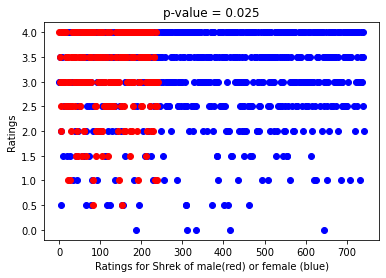

In [523]:
# Plot data:
plt.plot(femaleShrek['Shrek (2001)'].values,'o',color="blue")
plt.plot(maleShrek['Shrek (2001)'].values,'o',color="red")
plt.xlabel('Ratings for Shrek of male(red) or female (blue)')
plt.ylabel('Ratings')
plt.title('p-value = {:.3f}'.format(p))
plt.show()

I combined the two columns of ratings for ‘Shrek (2001)’ and the Gender Identity column, then dropped nan row-wise and separated the rating data into two datasets for male and female. Since movie ratings cannot be reduced to mean because of the psychological value behind each rating, and there are two independent datasets, I performed the Mann-Whitney U test. <br>
P-value (rounded to 3 decimal places) = 0.025 < 0.05 <br>
Hence, we reject the null hypothesis.<br>
Conclusion: enjoyment of ‘Shrek (2001)’ is gendered.

### Question 5

Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?

In [530]:
lion = pd.DataFrame(df['The Lion King (1994)'])
combined = pd.concat([lion, onlyChild], axis=1)
combined = combined.dropna(axis=0,how='any')
combined

,The Lion King (1994),Are you an only child? (1: Yes; 0: No; -1: Did not respond)
0,4.0,0
2,4.0,1
3,3.0,0
4,4.0,1
5,4.0,1
...,...,...
1090,3.5,0
1091,4.0,0
1092,3.5,0
1093,3.5,0


In [531]:
lionOnlyChild = combined[combined['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 1]
lionSiblings = combined[combined['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 0]

u,p = stats.mannwhitneyu(lionOnlyChild['The Lion King (1994)'],lionSiblings['The Lion King (1994)'])
print(p)

0.021599364978414245


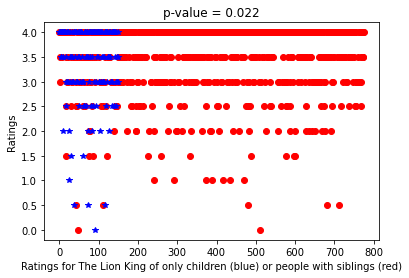

In [538]:
# Plot data:
plt.plot(lionSiblings['The Lion King (1994)'].values,'o',color="red")
plt.plot(lionOnlyChild['The Lion King (1994)'].values,'*',color="blue")
plt.xlabel('Ratings for The Lion King of only children (blue) or people with siblings (red)')
plt.ylabel('Ratings')
plt.title('p-value = {:.3f}'.format(p))
plt.show()

I combined the two columns of ratings for ‘The Lion King (1994)’ and the Only child column, then dropped nan row-wise and separated the rating data into two dataset for participants who are only children and participants who have siblings. Since movie ratings cannot be reduced to mean because of the psychological value behind each rating, and there are two independent datasets, I performed the Mann-Whitney U test. <br>
P-value  (rounded to 3 decimal places) = 0.022 < 0.05 <br>
Conclusion: People who are only children enjoy ‘The Lion King (1994)’ more than people with siblings

### Question 6

Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than
those who prefer to watch them alone?


In [539]:
wolf = pd.DataFrame(df['The Wolf of Wall Street (2013)'])
combined = pd.concat([wolf, socialViewPref], axis=1)
combined = combined.dropna(axis=0,how='any')
combined

,The Wolf of Wall Street (2013),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
3,4.0,1
4,3.0,1
5,2.5,0
6,1.0,0
7,3.5,1
...,...,...
1087,4.0,0
1090,4.0,1
1093,3.5,0
1094,2.0,0


0.05638214666114465


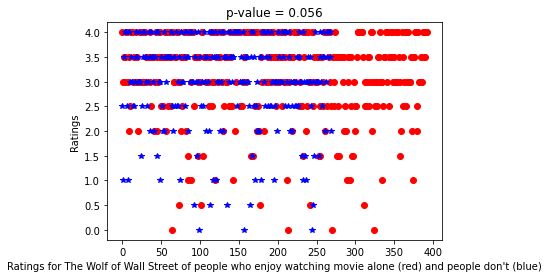

In [540]:
wolfAlone = combined[combined['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 1]
wolfSocial = combined[combined['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 0]

u,p = stats.mannwhitneyu(wolfAlone['The Wolf of Wall Street (2013)'],wolfSocial['The Wolf of Wall Street (2013)'])
print(p)

# Plot data:
plt.plot(wolfAlone['The Wolf of Wall Street (2013)'].values,'o',color="red")
plt.plot(wolfSocial['The Wolf of Wall Street (2013)'].values,'*',color="blue")
plt.xlabel('Ratings for The Wolf of Wall Street of people who enjoy watching movie alone (red) and people don\'t (blue)')
plt.ylabel('Ratings')
plt.title('p-value = {:.3f}'.format(p))
plt.show()

I combined the two columns of ratings for ‘The Wolf of Wall Street (2013)’ and the Social viewing preference column, then dropped nan row-wise and separated the rating data into two dataset for participants who think movies are best enjoyed alone and participants who do not think movies are best enjoyed alone (i.e. they enjoy watching with other people). Since movie ratings cannot be reduced to mean because of the psychological value behind each rating, and there are two independent datasets, I performed the Mann-Whitney U test. <br>
P-value  (rounded to 3 decimal places)= 0.056 > 0.05 <br>
Conclusion: We fail to reject the null hypothesis. People who enjoy watching movies alone enjoy watching ‘The Wolf of Wall Street (2013)’ just as people who enjoy watching movies socially.


### Question 7

There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’,
‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this
dataset. How many of these are of inconsistent quality, as experienced by viewers?

In [576]:
count = 0

# Star Wars
title = 'Star Wars' 
movie = df.loc[:,df.columns.str.contains(title)]
movie = movie.dropna(axis=0,how='any')
movie

h,p = stats.kruskal(movie['Star Wars: Episode IV - A New Hope (1977)'],movie['Star Wars: Episode II - Attack of the Clones (2002)'],movie['Star Wars: Episode V - The Empire Strikes Back (1980)'],movie['Star Wars: Episode 1 - The Phantom Menace (1999)'],movie['Star Wars: Episode VII - The Force Awakens (2015)'],movie['Star Wars: Episode VI - The Return of the Jedi (1983)'])
print(p)

if p < 0.05:
    print('Inconsistent')
    count +=1
else:
    print('Consistent')

6.940162236984522e-40
Inconsistent


In [577]:
# Harry Potter
title = 'Harry Potter' 
movie = df.loc[:,df.columns.str.contains(title)]
movie = movie.dropna(axis=0,how='any')
movie

h,p = stats.kruskal(movie['Harry Potter and the Sorcerer\'s Stone (2001)'],movie['Harry Potter and the Deathly Hallows: Part 2 (2011)'],movie['Harry Potter and the Goblet of Fire (2005)'],movie['Harry Potter and the Chamber of Secrets (2002)'])
print(p)

if p < 0.05:
    print('Inconsistent')
    count +=1
else:
    print('Consistent')

0.11790622831256074
Consistent


In [578]:
# The Matrix
title = 'Matrix' 
movie = df.loc[:,df.columns.str.contains(title)]
movie = movie.dropna(axis=0,how='any')
movie

h,p = stats.kruskal(movie['The Matrix Revolutions (2003)'],movie['The Matrix Reloaded (2003)'],movie['The Matrix (1999)'])
print(p)

if p < 0.05:
    print('Inconsistent')
    count +=1
else:
    print('Consistent')

1.7537323830838066e-09
Inconsistent


In [579]:
# Indiana Jones
title = 'Indiana Jones' 
movie = df.loc[:,df.columns.str.contains(title)]
movie = movie.dropna(axis=0,how='any')
movie

franchiseTitles = movie.columns

h,p = stats.kruskal(movie[franchiseTitles[0]],movie[franchiseTitles[1]],movie[franchiseTitles[2]],movie[franchiseTitles[3]])
print(p)

if p < 0.05:
    print('Inconsistent')
    count +=1
else:
    print('Consistent')

1.020118354785894e-11
Inconsistent


In [580]:
# Jurassic Park
title = 'Jurassic Park' 
movie = df.loc[:,df.columns.str.contains(title)]
movie = movie.dropna(axis=0,how='any')
movie

franchiseTitles = movie.columns

h,p = stats.kruskal(movie[franchiseTitles[0]],movie[franchiseTitles[1]],movie[franchiseTitles[2]])
print(p)

if p < 0.05:
    print('Inconsistent')
    count +=1
else:
    print('Consistent')

1.8492328391686058e-11
Inconsistent


In [581]:
# Pirates of the Caribbean
title = 'Pirates of the Caribbean' 
movie = df.loc[:,df.columns.str.contains(title)]
movie = movie.dropna(axis=0,how='any')
movie

franchiseTitles = movie.columns

h,p = stats.kruskal(movie[franchiseTitles[0]],movie[franchiseTitles[1]],movie[franchiseTitles[2]])
print(p)

if p < 0.05:
    print('Inconsistent')
    count +=1
else:
    print('Consistent')

0.035792727694248905
Inconsistent


In [582]:
# Toy Story
title = 'Toy Story' 
movie = df.loc[:,df.columns.str.contains(title)]
movie = movie.dropna(axis=0,how='any')
movie

franchiseTitles = movie.columns

h,p = stats.kruskal(movie[franchiseTitles[0]],movie[franchiseTitles[1]],movie[franchiseTitles[2]])
print(p)

if p < 0.05:
    print('Inconsistent')
    count +=1
else:
    print('Consistent')

7.902234665149812e-06
Inconsistent


In [583]:
# Batman
title = 'Batman' 
movie = df.loc[:,df.columns.str.contains(title)]
movie = movie.dropna(axis=0,how='any')
movie


franchiseTitles = movie.columns

h,p = stats.kruskal(movie[franchiseTitles[0]],movie[franchiseTitles[1]],movie[franchiseTitles[2]])
print(p)

if p < 0.05:
    print('Inconsistent')
    count +=1
else:
    print('Consistent')

4.1380499020034183e-19
Inconsistent


In [584]:
print(count)

7


For each of the 8 franchises [‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’], I extracted the rating data of all the movies in those franchises, then removing nan values row-wise for each franchise, since it is more logical to compare the ratings of participants who rated all the movies of that franchise. <br>
Since movie ratings cannot be reduced to mean because of the psychological value behind each rating, and there are more than two independent movie datasets for each franchise, I performed the Kruskal-Wallis test. <br>
The p-values (rounded to 3 decimal places)  are:


| Movie franchise | p-value | Conclusion |
| --- | --- | --- |
| ‘Star Wars’ | 0.000 | Inconsistent |
| ‘Harry Potter’ | 0.118 | Consistent |
| ‘The Matrix’ | 0.000 | Inconsistent |
| ‘Indiana Jones’ | 0.000 | Inconsistent |
| ‘Jurassic Park’ | 0.000 | Inconsistent |
| ‘Pirates of the Caribbean’ | 0.036 | Inconsistent |
| ‘Toy Story’ | 0.000 | Inconsistent |
| ‘Batman’ | 0.000 | Inconsistent |

Conclusion: 7 out of 8 movie franchises have inconsistent ratings by the viewers. The only franchise in this dataset with consistent ratings from viewers is ‘Harry Potter’.


### Question 8

Build a prediction model of your choice (regression or supervised learning) to predict movie
ratings (for all 400 movies) from personality factors only. Make sure to use cross-validation
methods to avoid overfitting and characterize the accuracy of your model.

2.5
(54, 7)


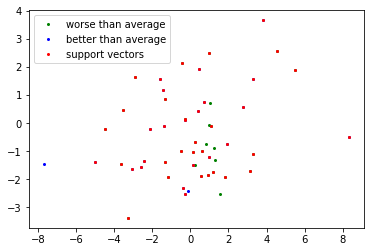

<function matplotlib.pyplot.show(close=None, block=None)>

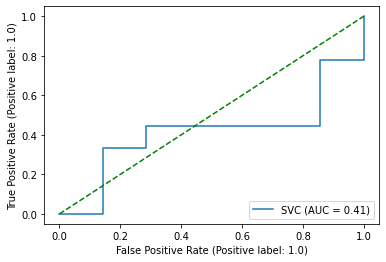

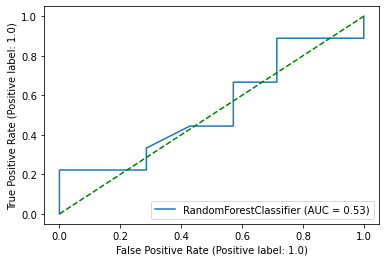

In [676]:
#draft
rotatedP = pd.DataFrame(rotatedPersona[:,0:6])
y = movieRatings.iloc[:,0]
labels = movieRatings.columns
med = y.median()
print(med)

dropIndex = y.drop(index=personaInd).index # Gets indices of differences
y = y.drop(dropIndex) # Drops indexes from saw
#x = np.column_stack((rotatedPersona[:,0],rotatedPersona[:,1],rotatedPersona[:,2],rotatedPersona[:,3],rotatedPersona[:,4],rotatedPersona[:,5]))

combined = pd.concat([y, rotatedP], axis=1).reset_index().drop(['index'], axis=1)
combined.loc[(combined[labels[0]] < med), labels[0]] = 0 # Order for this matters
combined.loc[(combined[labels[0]] > med), labels[0]] = 1

combined = combined.where(combined[labels[0]] != med)

combined = combined.dropna()
print(combined.shape)
y = combined[labels[0]].to_numpy()
x = combined.drop(labels[0],axis=1).to_numpy()

#SVM
clf = svm.SVC(kernel='linear').fit(x,y)
sV = clf.support_vectors_ # Retrieve the support vectors from the model
plt.plot(x[np.argwhere(y==0),0],x[np.argwhere(y==0),1],'o',markersize=2,color='green')
plt.plot(x[np.argwhere(y==1),0],x[np.argwhere(y==1),1],'o',markersize=2,color='blue')
plt.plot(sV[:,0],sV[:,1],'o',markersize=2,color='red')
plt.legend(['worse than average','better than average','support vectors'])
plt.show()

#Random Forest
rfcModel = RandomForestClassifier(n_estimators=100).fit(xTrain,yTrain) # 100 trees
rfcPredictions = rfcModel.predict(xTest)
modelAccuracy = accuracy_score(yTest,rfcPredictions)

plot_roc_curve(svmModel,xTest,yTest)
plt.plot([0,1],[0,1],'g--')
plot_roc_curve(rfcModel,xTest,yTest)
plt.plot([0,1],[0,1],'g--')
plt.show

In [738]:
labels = movieRatings.columns
rotatedP = pd.DataFrame(rotatedPersona[:,0:6])
RFCModelAccuracy = []

for i in range(400):  
    y = movieRatings.iloc[:,i]
    med = y.median()

    dropIndex = y.drop(index=personaInd).index # Gets indices of differences
    y = y.drop(dropIndex) # Drops indexes from saw
    #x = np.column_stack((rotatedPersona[:,0],rotatedPersona[:,1],rotatedPersona[:,2],rotatedPersona[:,3],rotatedPersona[:,4],rotatedPersona[:,5]))

    combined = pd.concat([y, rotatedP], axis=1).reset_index().drop(['index'], axis=1)
    combined.loc[(combined[labels[i]] < med), labels[i]] = 0 # Order for this matters
    combined.loc[(combined[labels[i]] > med), labels[i]] = 1

    combined = combined.where(combined[labels[i]] != med)

    combined = combined.dropna()
    
    y = combined[labels[i]].to_numpy()
    x = combined.drop(labels[i],axis=1).to_numpy()
    
    #split the data using 20-80 split
    xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size = 0.2,random_state=0)
    
    #Random Forest
    rfcModel = RandomForestClassifier(n_estimators=100).fit(xTrain,yTrain) # 100 trees
    rfcPredictions = rfcModel.predict(xTest)
    modelAccuracy = accuracy_score(yTest,rfcPredictions)
    RFCModelAccuracy.append(modelAccuracy)
    
print(len(RFCModelAccuracy))

400


In [739]:
print(np.mean(RFCModelAccuracy))
print(np.median(RFCModelAccuracy))
print(np.max(RFCModelAccuracy))
print(np.min(RFCModelAccuracy))

0.5208613639472468
0.5238095238095238
1.0
0.08333333333333333


In [742]:
maxM = labels[RFCModelAccuracy.index(np.max(RFCModelAccuracy))]
minM = labels[RFCModelAccuracy.index(np.min(RFCModelAccuracy))]
print(maxM)
print(movieRatings[maxM].count())
print(minM)
print(movieRatings[minM].count())

Spirited Away (2001)
542
3000 Miles to Graceland (2001)
77


Pirates of the Caribbean: Dead Man's Chest (2006)
[0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 1.]


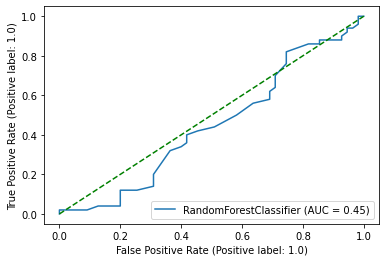

In [711]:
ind = RFCModelAccuracy.index(np.percentile(RFCModelAccuracy,50,interpolation='nearest'))
print(labels[ind])

y = movieRatings.iloc[:,ind]
med = y.median()

dropIndex = y.drop(index=personaInd).index # Gets indices of differences
y = y.drop(dropIndex) # Drops indexes from saw
#x = np.column_stack((rotatedPersona[:,0],rotatedPersona[:,1],rotatedPersona[:,2],rotatedPersona[:,3],rotatedPersona[:,4],rotatedPersona[:,5]))

combined = pd.concat([y, rotatedP], axis=1).reset_index().drop(['index'], axis=1)
combined.loc[(combined[labels[ind]] < med), labels[ind]] = 0 # Order for this matters
combined.loc[(combined[labels[ind]] > med), labels[ind]] = 1

combined = combined.where(combined[labels[ind]] != med)

combined = combined.dropna()
    
y = combined[labels[ind]].to_numpy()
x = combined.drop(labels[ind],axis=1).to_numpy()
#split the data using 20-80 split
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size = 0.2,random_state=0)
    
#Random Forest
rfcModel = RandomForestClassifier(n_estimators=100).fit(xTrain,yTrain) # 100 trees
rfcPredictions = rfcModel.predict(xTest)
modelAccuracy = accuracy_score(yTest,rfcPredictions)

plot_roc_curve(rfcModel,xTest,yTest)
plt.plot([0,1],[0,1],'g--')
plt.show

print(yTest)

Example of a ROC curve

In [712]:
labels = movieRatings.columns
RegressionModelAccuracy = []

for i in range(400):
    rotatedP = pd.DataFrame(rotatedPersona[:,0:6])
    y = movieRatings.iloc[:,i]
    med = y.median()

    dropIndex = y.drop(index=personaInd).index # Gets indices of differences
    y = y.drop(dropIndex) # Drops indexes from saw
    #x = np.column_stack((rotatedPersona[:,0],rotatedPersona[:,1],rotatedPersona[:,2],rotatedPersona[:,3],rotatedPersona[:,4],rotatedPersona[:,5]))

    combined = pd.concat([y, rotatedP], axis=1).reset_index().drop(['index'], axis=1)
    combined.loc[(combined[labels[i]] < med), labels[i]] = 0 # Order for this matters
    combined.loc[(combined[labels[i]] > med), labels[i]] = 1

    combined = combined.where(combined[labels[i]] != med)

    combined = combined.dropna()
    
    y = combined[labels[i]].to_numpy()
    x = combined.drop(labels[i],axis=1).to_numpy()
    #split the data using 20-80 split
    xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size = 0.2,random_state=0)
    model = LinearRegression().fit(xTrain,yTrain)
    rSqr = model.score(xTest,yTest)
    RegressionModelAccuracy.append(rSqr)

In [713]:
print(np.mean(RegressionModelAccuracy))
print(np.median(RegressionModelAccuracy))
print(np.max(RegressionModelAccuracy))
print(np.min(RegressionModelAccuracy))

-0.16862415162986846
-0.07367461389276186
1.0
-3.0384857601608317


In [ ]:
    #SVM
    svmModel = svm.SVC(kernel='linear').fit(xTrain,yTrain)
    svmPredictions = svmModel.predict(xTest)
    modelAccuracy = accuracy_score(yTest,svmPredictions)
    SVMModelAccuracy.append(modelAccuracy)

Using the personality in question 2 after PCA, I used the first 6 principle components of the rotated data as the predictors for movie ratings. I created a model to predict individual ratings of individual movies based on these 6 principle components of the personality data. <br>
I did a median split for the movie ratings, and removed the ratings which are the same as the median. The movie ratings that are higher than the median are “above average,” and the ones less than the median are “below average.”<br>
I kept the indices of the rows with nan of the personality data to remove those rows from the movie rating data, then combined each movie rating with the predictors and removed nan row-wise. I then separated the predictors and the movie rating into x and y, then split the data into training and testing datasets using the train_test_split method from sklearn, where 80% of the data is training and 20% is for testing.
After having the data, I used the random forest on the training set to get a model. Then, I did cross-validation on the 20% testing dataset using the AUC method. Among the 400 movies, the maximum AUC was 1.000, while the mean and median was around 0.520, and the minimum was 0.083. The movie with the highest AUC was ‘Spirited Away (2001)’, while the movie with the lowest AUC was ‘3000 Miles to Graceland (2001)’.
One of the problems with this prediction is that some movies do not have many real ratings, so it is difficult for the prediction to be accurate. <br>

I also tried to create a multiple regression model, but the result was not as good as the random forests method, as the mean COD is only 0.169.


### Question 9

Build a prediction model of your choice (regression or supervised learning) to predict movie
ratings (for all 400 movies) from gender identity, sibship status and social viewing preferences (columns 475-477) only. Make sure to use cross-validation methods to avoid overfitting and characterize the accuracy of your model.

In [743]:
labels = movieRatings.columns
predictors = pd.concat([gender,onlyChild,socialViewPref], axis=1)
RFCModelAccuracy = []

for i in range(400):  
    y = movieRatings.iloc[:,i]
    med = y.median()

    combined = pd.concat([y, predictors], axis=1)
    combined.loc[(combined[labels[i]] < med), labels[i]] = 0 # Order for this matters
    combined.loc[(combined[labels[i]] > med), labels[i]] = 1

    combined = combined.where(combined[labels[i]] != med)

    combined = combined.dropna()
    
    y = combined[labels[i]].to_numpy()
    x = combined.drop(labels[i],axis=1).to_numpy()
    #split the data using 20-80 split
    xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size = 0.2,random_state=0)
    
    #Random Forest
    rfcModel = RandomForestClassifier(n_estimators=100).fit(xTrain,yTrain) # 100 trees
    rfcPredictions = rfcModel.predict(xTest)
    modelAccuracy = accuracy_score(yTest,rfcPredictions)
    RFCModelAccuracy.append(modelAccuracy)
    
print(np.mean(RFCModelAccuracy))
print(np.median(RFCModelAccuracy))
print(np.max(RFCModelAccuracy))
print(np.min(RFCModelAccuracy))

0.5392738970092542
0.5465367965367965
1.0
0.08333333333333333


In [744]:
maxM = labels[RFCModelAccuracy.index(np.max(RFCModelAccuracy))]
minM = labels[RFCModelAccuracy.index(np.min(RFCModelAccuracy))]
print(maxM)
print(movieRatings[maxM].count())
print(minM)
print(movieRatings[minM].count())

Spirited Away (2001)
542
Crimson Tide (1995)
74


Shrek 2 (2004)
[0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 0. 0.]


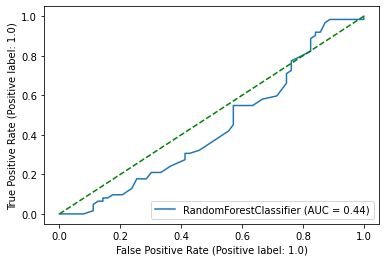

In [715]:
ind = RFCModelAccuracy.index(np.percentile(RFCModelAccuracy,50,interpolation='nearest'))
print(labels[ind])

y = movieRatings.iloc[:,ind]
med = y.median()

dropIndex = y.drop(index=personaInd).index # Gets indices of differences
y = y.drop(dropIndex) # Drops indexes from saw
#x = np.column_stack((rotatedPersona[:,0],rotatedPersona[:,1],rotatedPersona[:,2],rotatedPersona[:,3],rotatedPersona[:,4],rotatedPersona[:,5]))

combined = pd.concat([y, rotatedP], axis=1).reset_index().drop(['index'], axis=1)
combined.loc[(combined[labels[ind]] < med), labels[ind]] = 0 # Order for this matters
combined.loc[(combined[labels[ind]] > med), labels[ind]] = 1

combined = combined.where(combined[labels[ind]] != med)

combined = combined.dropna()
    
y = combined[labels[ind]].to_numpy()
x = combined.drop(labels[ind],axis=1).to_numpy()
#split the data using 20-80 split
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size = 0.2,random_state=0)
    
#Random Forest
rfcModel = RandomForestClassifier(n_estimators=100).fit(xTrain,yTrain) # 100 trees
rfcPredictions = rfcModel.predict(xTest)
modelAccuracy = accuracy_score(yTest,rfcPredictions)

plot_roc_curve(rfcModel,xTest,yTest)
plt.plot([0,1],[0,1],'g--')
plt.show

print(yTest)

Example of a ROC curve 

I created a model to predict individual ratings of individual movies based on gender identity, sibship status, and social viewing preference. Hence, the predictors are gender identity, sibship status, and social viewing preference.
I did a median split for the movie ratings, and removed the ratings which are the same as the median. The movie ratings that are higher than the median are “above average,” and the ones less than the median are “below average.”
I combined each movie rating with the predictors and removed nan row-wise. I then separated the predictors and the movie rating into x and y, then split the data into training and testing datasets using the train_test_split method from sklearn, where 80% of the data is training and 20% is for testing.
After having the data, I used the random forest on the training set to get a model. Then, I did cross-validation on the 20% testing dataset using the AUC method. Among the 400 movies, the maximum AUC was 1.000, while the mean was 0.540 and median was around 0.550, and the minimum was 0.083. Based on the mean and median, gender identity, sibship status, and social viewing preference are slightly better at predicting movie ratings compared to personalities. The movie with the highest AUC was ‘Spirited Away (2001)’, while the movie with the lowest AUC was ‘Crimson Tide (1995)’.

One of the problems with this prediction is that some movies do not have many real ratings, so it is difficult for the prediction to be accurate. 


### Question 10

Build a prediction model of your choice (regression or supervised learning) to predict movie ratings (for all 400 movies) from all available factors that are not movie ratings (columns 401- 477). Make sure to use cross-validation methods to avoid overfitting and characterize the accuracy of your model.

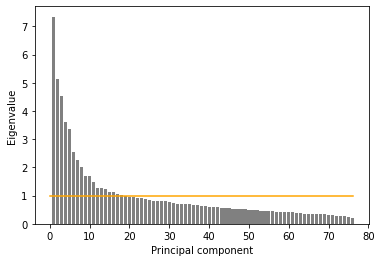

In [752]:
#PCA first because there would be overlapping 
# dont include the categorical data
predictors = df.iloc[:,400:476]
predictors = predictors.dropna(axis=0,how='any')
predictInd = predictors.index

zscored = stats.zscore(predictors)
pca = PCA().fit(zscored)
eigVals = pca.explained_variance_
loadings = pca.components_
rotated = pca.fit_transform(zscored)

#scree plot
numClasses = predictors.shape[1]
x = np.linspace(1,numClasses,numClasses)
plt.bar(x, eigVals, color='gray')
plt.plot([0,numClasses],[1,1],color='orange') # Orange Kaiser criterion line for the fox
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

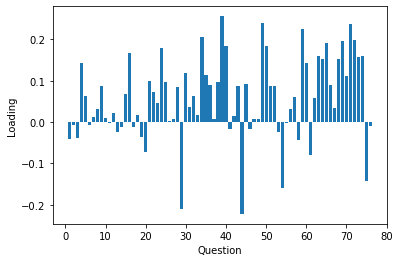

Worries a lot
Can be moody
The emotions on the screen "rub off" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared


In [753]:
labels = predictors.columns
whichPrincipalComponent = 1 # Select and look at once factor at a time 
plt.bar(x,loadings[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show() # Show bar plot

loadAbs = np.abs(loadings[whichPrincipalComponent,:])
#stack index row 
indArr = []
for i in range(loadAbs.shape[0]):
    indArr.append(i)
indArr = np.array(indArr,dtype=int)
loadAbs = np.stack((indArr,loadAbs),axis=0)
loadAbs = np.transpose(loadAbs)
loadingsAbs = pd.DataFrame(loadAbs,columns=['index','loadingsAbs'])

loadingsAbs = loadingsAbs.sort_values('loadingsAbs', axis=0,ascending=False)
#print(loadingsAbs)

# Display questions
indexes = loadingsAbs.loc[:,loadingsAbs.columns.str.contains('index')] 
maxInd = int(indexes.iloc[0])
print(labels[maxInd])
print(labels[int(indexes.iloc[1])])
print(labels[int(indexes.iloc[2])])

In [755]:
threshold = 1
print('Number of factors selected by Kaiser criterion:', np.count_nonzero(eigVals > threshold))
covarExplained = eigVals/sum(eigVals)*100
threshold = 90
eigSum = np.cumsum(covarExplained)
print('Number of factors to account for at least 90% variance:', np.count_nonzero(eigSum < threshold) + 1)
print(np.sum(covarExplained[:19]))

Number of factors selected by Kaiser criterion: 18
Number of factors to account for at least 90% variance: 55
58.82311819008701


Before creating a model to predict individual ratings of individual movies based on all other factors beside movie ratings, I did PCA on all the sensation seeking, personality and movie experience factors (columns 401 to 474), since there are 73 factors so there would definitely be dependent variables. I left the 3 categorical datasets of gender, social viewing preference and only child out of the PCA and combined these data afterwards. <br>
Number of factors selected by Kaiser criterion: 18 <br>
Account for 59% of the variance
<br>
First principle component (the predictor that account for the most)
Top 3 factors are: 
1. Worries a lot
2. Can be moody
3. The emotions on the screen "rub off" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared
<br>

This can be interpreted as “being emotional”


In [756]:
labels = movieRatings.columns
predictorsNonCata = pd.DataFrame(rotated[:,:19])
predictors = pd.concat([predictorsNonCata,gender,onlyChild,socialViewPref], axis=1)
RFCModelAccuracy = []

for i in range(400):  
    y = movieRatings.iloc[:,i]
    med = y.median()

    combined = pd.concat([y, predictors], axis=1)
    combined.loc[(combined[labels[i]] < med), labels[i]] = 0 # Order for this matters
    combined.loc[(combined[labels[i]] > med), labels[i]] = 1

    combined = combined.where(combined[labels[i]] != med)

    combined = combined.dropna()
    
    y = combined[labels[i]].to_numpy()
    x = combined.drop(labels[i],axis=1).to_numpy()
    #split the data using 20-80 split
    xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size = 0.2,random_state=0)
    
    #Random Forest
    rfcModel = RandomForestClassifier(n_estimators=100).fit(xTrain,yTrain) # 100 trees
    rfcPredictions = rfcModel.predict(xTest)
    modelAccuracy = accuracy_score(yTest,rfcPredictions)
    RFCModelAccuracy.append(modelAccuracy)
    
print(np.mean(RFCModelAccuracy))
print(np.median(RFCModelAccuracy))
print(np.max(RFCModelAccuracy))
print(np.min(RFCModelAccuracy))

0.5395131319224474
0.54
1.0
0.14285714285714285


In [757]:
maxM = labels[RFCModelAccuracy.index(np.max(RFCModelAccuracy))]
minM = labels[RFCModelAccuracy.index(np.min(RFCModelAccuracy))]
print(maxM)
print(movieRatings[maxM].count())
print(minM)
print(movieRatings[minM].count())

Spirited Away (2001)
542
Double Jeopardy (1999)
95


The Big Lebowski (1998)
[1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 0. 1. 1.]


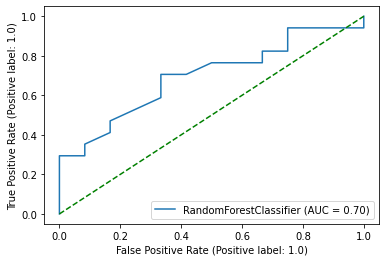

In [759]:
ind = 305
print(labels[ind])

y = movieRatings.iloc[:,ind]
med = y.median()

dropIndex = y.drop(index=personaInd).index # Gets indices of differences
y = y.drop(dropIndex) # Drops indexes from saw
#x = np.column_stack((rotatedPersona[:,0],rotatedPersona[:,1],rotatedPersona[:,2],rotatedPersona[:,3],rotatedPersona[:,4],rotatedPersona[:,5]))

combined = pd.concat([y, rotatedP], axis=1).reset_index().drop(['index'], axis=1)
combined.loc[(combined[labels[ind]] < med), labels[ind]] = 0 # Order for this matters
combined.loc[(combined[labels[ind]] > med), labels[ind]] = 1

combined = combined.where(combined[labels[ind]] != med)

combined = combined.dropna()
    
y = combined[labels[ind]].to_numpy()
x = combined.drop(labels[ind],axis=1).to_numpy()
#split the data using 20-80 split
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size = 0.2,random_state=0)
    
#Random Forest
rfcModel = RandomForestClassifier(n_estimators=100).fit(xTrain,yTrain) # 100 trees
rfcPredictions = rfcModel.predict(xTest)
modelAccuracy = accuracy_score(yTest,rfcPredictions)

plot_roc_curve(rfcModel,xTest,yTest)
plt.plot([0,1],[0,1],'g--')
plt.show

print(yTest)

Example of a ROC curve

I did a median split for the movie ratings, and removed the ratings which are the same as the median. The movie ratings that are higher than the median are “above average,” and the ones less than the median are “below average.”
I combined each movie rating with the 18 predictors in the new coordinates of rotated data after doing the PCA along with the 3 categorical data of gender, social viewing preference and only child and removed nan row-wise. I then separated the predictors and the movie rating into x and y, then split the data into training and testing datasets using the train_test_split method from sklearn, where 80% of the data is training and 20% is for testing.
After having the data, I used the random forest on the training set to get a model. Then, I did cross-validation on the 20% testing dataset using the AUC method. Among the 400 movies, the maximum AUC was 1.000, while the mean was 0.540 and median was around 0.54, and the minimum was 0.214. Based on the min, this is a better predictor set than in the previous two questions. The movie with the highest AUC was ‘Spirited Away (2001)’, while the movie with the lowest AUC was ‘Double Jeopardy (1999)’.

One of the problems with this prediction is that some movies do not have many real ratings, so it is difficult for the prediction to be accurate. 
